# Introduction to Robot Intelligence HW 3: Coding Questions

The is the coding potion of Homework 3. For submission instructions, please see the theory portion of Homework 3.

This portion of the homework consists of a single problem.

## Problem 1: Forward Kinematics for a Simple Arm


Consider the robot arm pictured below. This arm consists of **three** different joints. We can enumerate these joints as *joint 1*, *joint 2*, and *joint 3* from left-to-right as pictured in the illustration below on the left, with *joint 3* being the "end effector," i.e. the joint furthest on the periphery. The joints of the arm are interceded by its links, $a_1$, $a_2$, and $a_3$, as shown in the illustration on the right.

In this problem, we would like you to implement a class representing forward kinematics on this robot arm.

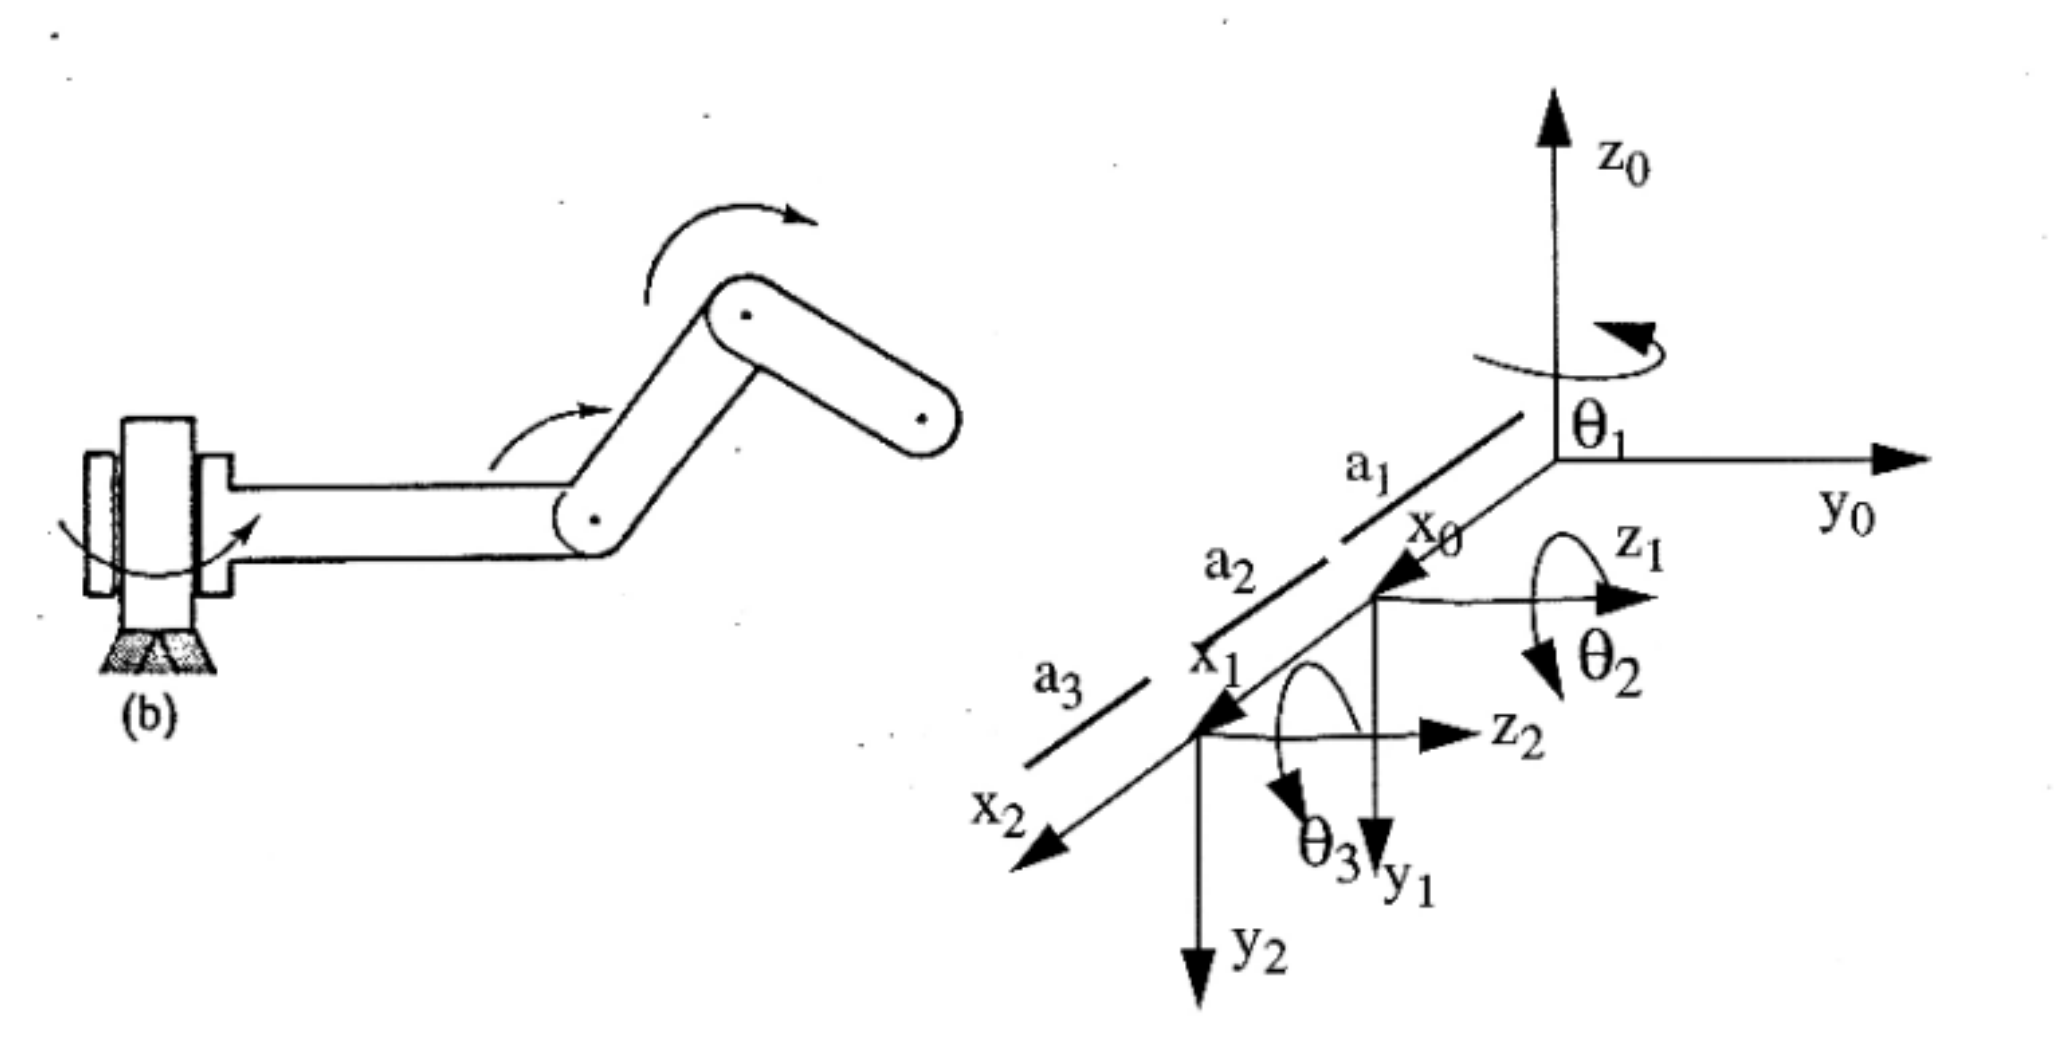

Start by defining the transformation matrices for the frames of reference corresponding to the joints of the robot. You can define them in the `init` function of the Robot class. Assume the three links, $a_1$, $a_2$, $a_3$ are of size 25, 17, 15, respectively.

In [ ]:
from numpy.core.arrayprint import array2string
"""
Please use the class structure below, and make sure your code can run the
two tests included.  You may not use any kinematics libraries in your solution,
although you may find it helpful to compare the outputs you calculate with the
results from those libraries.
"""

import numpy as np


class Robot:
	def __init__(self):
		'''TODO: write code to initialize your robot
		'''
		self.a1 = 25
		self.a2 = 17
		self.a3 = 15

	def forward_kinematics(self, joint_angles):
		'''TODO: define this method to calculate the end effector position with
		respect to the reference frame of the base. It accepts a list (or numpy
		array) of joint angles [theta1, theta2, theta3] (as drawn above) as input,
		and returns the (x, y, z) position of the end effector in 3-D space'''
		[theta1, theta2, theta3] = joint_angles
		A1 = np.array([
				[1, 0, 0, 0],
				[0, np.cos(np.pi/2), -np.sin(np.pi/2), 0],
				[0, np.sin(np.pi/2), np.cos(np.pi/2), 0],
				[0, 0, 0, 1]
		]) @ np.array([
				[np.cos(theta1), 0, np.sin(theta1), 0],
				[0, 1, 0, 0],
				[-np.sin(theta1), 0, np.cos(theta1), 0],
				[0, 0, 0, 1]
		])
		A2 = np.array([
				[1, 0, 0, self.a1],
				[0, 1, 0, 0],
				[0, 0, 1, 0],
				[0, 0, 0, 1]
		]) @ np.array([
				[np.cos(theta2), np.sin(theta2), 0, 0],
				[-np.sin(theta2), np.cos(theta2), 0, 0],
				[0, 0, 1, 0],
				[0, 0, 0, 1]
		])
		A3 = np.array([
				[1, 0, 0, self.a2],
				[0, 1, 0, 0],
				[0, 0, 1, 0],
				[0, 0, 0, 1]
		]) @ np.array([
				[np.cos(theta3), np.sin(theta3), 0, 0],
				[-np.sin(theta3), np.cos(theta3), 0, 0],
				[0, 0, 1, 0],
				[0, 0, 0, 1]
		])
		pos = np.array([self.a3, 0, 0, 1])
		T = A1 @ A2 @ A3
		return np.dot(T, pos)[0:3]

In [ ]:
"""
TEST CASES

Use these test cases to check your code.
"""
import numpy as np
from tabulate import tabulate

def test_forward_kinematics(robot):
    joints = [np.array([0,0,0]),
              np.array([0,np.pi/2,0]),
              np.array([0,0,np.pi/2]),
              np.array([np.pi/2,0,np.pi/2]),
              np.array([-np.pi,0,np.pi/2])]

    expected_results = [[57, 0, 0],
                        [25, 0, -32],
                        [42, 0, -15],
                        [0, 42, -15],
                        [-42, 0, -15]]

    results = []
    for j,exp in zip(joints,expected_results):
        pos = robot.forward_kinematics(j)
        err = np.linalg.norm(pos - np.array(exp),1)
        results.append([j, pos.round(2), exp, np.round(err,2)])
    print(tabulate(results, headers=['Pos', 'Forward', 'Expected Result', 'L1 Error']))


robot = Robot()
test_forward_kinematics(robot)

Pos                                    Forward           Expected Result      L1 Error
-------------------------------------  ----------------  -----------------  ----------
[0 0 0]                                [57.  0.  0.]     [57, 0, 0]                  0
[0.         1.57079633 0.        ]     [ 25.  -0. -32.]  [25, 0, -32]                0
[0.         0.         1.57079633]     [ 42.  -0. -15.]  [42, 0, -15]                0
[1.57079633 0.         1.57079633]     [  0.  42. -15.]  [0, 42, -15]                0
[-3.14159265  0.          1.57079633]  [-42.  -0. -15.]  [-42, 0, -15]               0
